### Analysis of Epinions Data

We are provided with the Epinions data collected through a general consumer review web site Epinions.com. Each user on the site can rate and post a review for products (items) and other users would rate the review to show the helpfulness of the review.
In this data, for each user, we have user ID, gender, ratings (1-5) and reviews towards the products they bought. For each rating, we have the product name and its category, the rating score, the time point when the rating is created, and the helpfulness (1-5) of this rating.

Originally, there are several separate files to record the user-item rating info, user demographic info and item descriptive info, we have conducted preliminary processing to map and merge the data into one csv file named 'Epinions_test_data.csv'. The header of the csv file is shown below. 


| userId | gender | rating | review| item | category | helpfulness | timestamp |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __item__ - the product's name
* __category__ - the category of the item
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __helpfulness__ - the helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created

Note that, a same user (i.e., a same userId) corresponds to a same gender; a same item corresponds to a same category; a same user (i.e., a same userId) may rate multiple items; a same item may receive ratings and reviews from multiple users and each review is associted with a single helpfulness value calculated based on the feedbacks from other users.

There are four questions to explore with the data as shown below.

 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [3]:
#Displaying the data frame
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv (r'C:\Users\hp\Documents\GitHub\portfolio-deekshajagga-main\Epinions_test_data.csv')
print(df)

print('\n')

#Counting null values

#Gender
gender= df['gender'].isna().sum()

#Rating
rating= df['rating'].isna().sum()

#helpfulness
helpfulness= df['helpfulness'].isna().sum()

print("Null values in gender-", gender)
print("Null values in rating-", rating)
print("Null values in helpfulness-", helpfulness)

#Review
print ("None value in review-", (df['review']=='none').sum())

print('\n')

#Length of data
print ("Length of data-", len(df))



      userId gender                                       item  rating  \
0       1324      F                                        NBC     5.0   
1      10222      M                                    NetFlix     2.0   
2       2777      M                                Toy Story 2     4.0   
3      11763      M                                 Fight Club     5.0   
4       6003      M                              Quicken Loans     5.0   
...      ...    ...                                        ...     ...   
9995    5212      F                              Perfect Storm     4.0   
9996    5212      F                          What Lies Beneath     2.0   
9997    5319      M                                  Gladiator     5.0   
9998    5319      F  The Sims 2: Open for Business for Windows     5.0   
9999    7606      F                      Alta Vista (by 1stUp)     1.0   

                                                 review  helpfulness  \
0                            They made 

In [5]:
#Removing the data
df1 = df.dropna(subset=['gender', 'helpfulness', 'rating'])
df2= df1.drop(df1[df1.review=="none"].index)

#Displaying the data frame
print(df2)

print('\n')

#Counting null values

#Gender
gender= df2['gender'].isna().sum()

#Rating
rating= df2['rating'].isna().sum()

#helpfulness
helpfulness= df2['helpfulness'].isna().sum()

print("Null values in gender after removing-", gender)
print("Null values in rating after removing-", rating)
print("Null values in helpfulness after removing-", helpfulness)

print('\n')

#Length of data

print ("Length of data after removing null values-", len(df2))

      userId gender                                       item  rating  \
0       1324      F                                        NBC     5.0   
1      10222      M                                    NetFlix     2.0   
2       2777      M                                Toy Story 2     4.0   
3      11763      M                                 Fight Club     5.0   
4       6003      M                              Quicken Loans     5.0   
...      ...    ...                                        ...     ...   
9995    5212      F                              Perfect Storm     4.0   
9996    5212      F                          What Lies Beneath     2.0   
9997    5319      M                                  Gladiator     5.0   
9998    5319      F  The Sims 2: Open for Business for Windows     5.0   
9999    7606      F                      Alta Vista (by 1stUp)     1.0   

                                                 review  helpfulness  \
0                            They made 

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [77]:
#2.1
## Unique users
print ("Unique users-", df2['userId'].nunique())

## Unique reviews
print ("Unique reviews-", df2['review'].nunique())

## Unique items
print ("Unique items-", df2['item'].nunique())

## Unique categories
print ("Unique categories-", df2['category'].nunique())

Unique users- 4326
Unique reviews- 9727
Unique items- 89
Unique categories- 9


In [76]:
#2.2
## Total number of rating records
print ("Total number of rating records-", len(df2.rating))

## Mean of rating records
print ("Mean of ratings-", df2.rating.mean())

## Standard Deviation of rating records
print ("Standard Deviation of rating records-", df2.rating.std())

## Minimum & Maximum regarding all rating records
print ("Minimum & Maximum regarding all rating records-", df2.rating.min(), ",", df2.rating.max())

Total number of rating records- 9890
Mean of ratings- 3.701516683518706
Standard Deviation of rating records- 1.3870264508440455
Minimum & Maximum regarding all rating records- 1.0 , 5.0


In [75]:
#2.3
male= (df2[df2.gender=="M"])
female= (df2[df2.gender=="F"])

## Mean of rating records by gender
print ("Mean of Male ratings-", male.rating.mean())
print ("Mean of Female ratings-", female.rating.mean())

## Standard Deviation of rating records by gender
print ("Standard Deviation of Male rating records-", male.rating.std())
print ("Standard Deviation of Female rating records-", female.rating.std())

## Minimum & Maximum regarding rating records by gender
print ("Minimum & Maximum regarding male rating records-", male.rating.min(), ",", male.rating.max())
print ("Minimum & Maximum regarding female rating records-", female.rating.min(), ",", female.rating.max())

Mean of Male ratings- 3.6906474820143886
Mean of Female ratings- 3.712039800995025
Standard Deviation of Male rating records- 1.3861260726924873
Standard Deviation of Female rating records- 1.3879544352532596
Minimum & Maximum regarding male rating records- 1.0 , 5.0
Minimum & Maximum regarding female rating records- 1.0 , 5.0


In [93]:
#2.4
## Mean of rating records by items
print("Mean of rating records by items")
print (df2.groupby(['item'])['rating'].mean())

print('\n')

## Standard Deviation of rating records by item
print("Standard Deviation of rating records by items")
print (df2.groupby(['item'])['rating'].std())

print('\n')

## Minimum & Maximum regarding rating records by item
print("Minimum & Maximum regarding rating records by gender")
print ("Minimum")
print (df2.groupby(['item'])['rating'].min())

print('\n')

print("Maximum")
print (df2.groupby(['item'])['rating'].max())

Mean of rating records by items
item
AOL (America Online)     2.538117
All Advantage            3.539216
Alta Vista (by 1stUp)    3.369048
Amazon.com               3.836364
American Airlines        3.163043
                           ...   
Wendy's                  4.102273
What Lies Beneath        3.576471
X-Men                    4.033058
X.com                    3.892473
eBay                     4.352542
Name: rating, Length: 89, dtype: float64


Standard Deviation of rating records by items
item
AOL (America Online)     1.339841
All Advantage            1.466600
Alta Vista (by 1stUp)    1.369018
Amazon.com               1.455942
American Airlines        1.477131
                           ...   
Wendy's                  1.155096
What Lies Beneath        1.189002
X-Men                    0.893811
X.com                    1.528443
eBay                     0.935570
Name: rating, Length: 89, dtype: float64


Minimum & Maximum regarding rating records by gender


Minimum
item
AOL (Ameri

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

(array([1, 2]), [Text(1, 0, 'F'), Text(2, 0, 'M')])

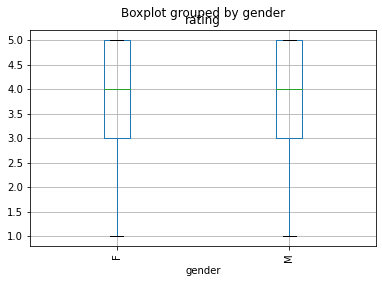

In [14]:
#Correlation between gender and ratings
df2.boxplot("rating", by="gender")
plt.xticks(rotation=90)

### Observations
- The ratings regardless of the gender are quite similar and symmetrical in nature.
- The measures of central tendencies of both the genders are quite the same. 
- The different gender values do not seem to affect the ratings at all. Hence, no correlation exists between gender and ratings. 

(array([1, 2, 3, 4, 5, 6]),
 [Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0')])

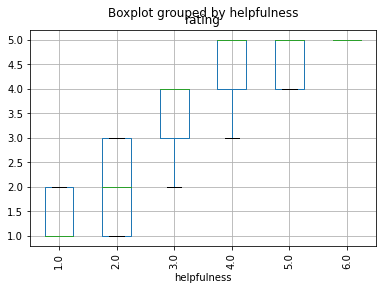

In [15]:
#Correlation between helpfulness and ratings
df2.boxplot("rating", by="helpfulness")
plt.xticks(rotation=90)

### Observations
- It's abundantly clear from the boxplot that there is a direct correlation between helpfulness and ratings.
- With increase in helpfulness of the individual, their rating tends to go up as well. 
- All individuals with higher value of helpfulness, have high ratings.

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Books'),
  Text(2, 0, 'Games'),
  Text(3, 0, 'Hotels & Travel'),
  Text(4, 0, 'Kids & Family'),
  Text(5, 0, 'Media'),
  Text(6, 0, 'Movies'),
  Text(7, 0, 'Online Stores & Services'),
  Text(8, 0, 'Personal Finance'),
  Text(9, 0, 'Restaurants & Gourmet')])

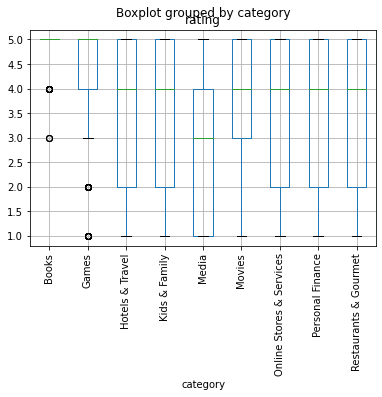

In [16]:
# Correlation between Category and ratings
df2.boxplot("rating", by="category")
plt.xticks(rotation=90)

### Observations
- There doesn't seem to be any direct/indirect correlation between category and ratings. 
- However, there are quite a few outliers in the Books and Games categories.
- Overall, the rating distribution of almost all the categories are quite similar. 
- Ratings of the Media category is significantly less than the others. 
- The impact of category on ratings is similar to as that of gender, which is also quite limited. 

### Summary Analysis
- The dataset contains 4326 unique users' ratings, where the ratings range from 1 to 5; and the mean rating is around 3.7.
- The features, i.e., gender, category are not correlated with ratings; where gender holds the worst case; this indicates it is not easy to infer rating with these features.
- The feature helpfulness is directly correlated with ratings. 
- The dataset contains a small number of missing values, around 110 records;

#### Q4. Detect and remove outliers

We may define outlier users and items with three rules:

* reviews of which helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users and items. After that, __print the length of the data__.

In [16]:
# Removing reviews which helpfulness is no more than 2

remove_outlier = df2.drop(df2.index[(df2['helpfulness'] <= 2)])
print('Reviews whose helpfulness is no more than 2-', len(remove_outlier))

Reviews whose helpfulness is no more than 2- 7562


In [25]:
# User count after removing review with helpfulness no more than 2
user_helpfulness= remove_outlier.groupby(remove_outlier['userId'])['rating'].count().reset_index(name='count')
print("Length of data after removing reviews with helpfulness less than 2-", len(user_helpfulness))

Length of data after removing reviews with helpfulness less than 2- 3667


In [29]:
user_helpfulness.head()

,userId,count
0,3,3
1,4,3
2,7,1
3,10,1
4,12,1


In [37]:
# Number of users who rated greater than 7 items

user_item= user_helpfulness[user_rating['count']>=7]['userId'].tolist()
print (len(user_item))

135


In [39]:
# Number of users who rated less than 7

user_item_rate= remove_outlier[remove_outlier['userId'].isin(user_item)]
print("Length after removing the users who rated less than 7 items-", len(user_item_rate))

Length after removing the users who rated less than 7 items- 1292


In [40]:
# Grouping items and rating

group_item= user_item_rate.groupby(['item'])['rating'].count().reset_index(name='count')
group_item.head()

,item,count
0,AOL (America Online),26
1,All Advantage,29
2,Alta Vista (by 1stUp),3
3,Amazon.com,10
4,American Airlines,9


In [42]:
# Number of items that received more than 11 ratings

rate_item= group_item[group_item['count']>=11]['item'].tolist()
print ("Number of items that received more than 11 ratings-", len(rate_item))

Number of items that received more than 11 ratings- 57


In [45]:
# Number of items that received less than 11 ratings

item_rate= user_item_rate[user_item_rate['item'].isin(rate_item)]
print ("Number of items that received less than 11 ratings-", len(item_rate))

Number of items that received less than 11 ratings- 1080


In [47]:
# Exporting file into csv
item_rate.to_csv('Epnions_test_data_clean.csv', index=False)